Importuri

In [86]:
import numpy, matplotlib.pyplot as plt, scipy.io.wavfile as wavf, scipy.signal as sig, sounddevice, time

Exercitiul 1

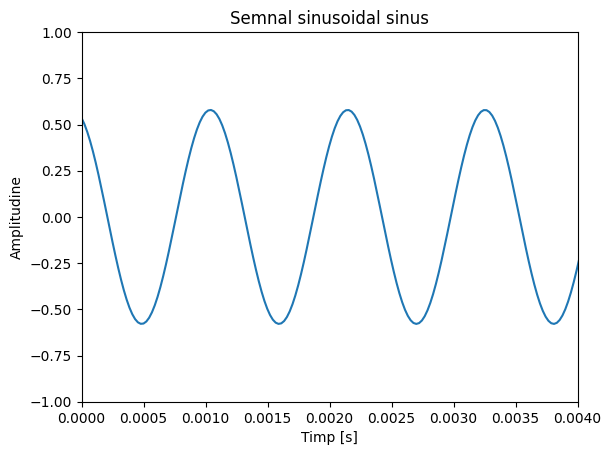

Finished first signal, waiting 2 seonds


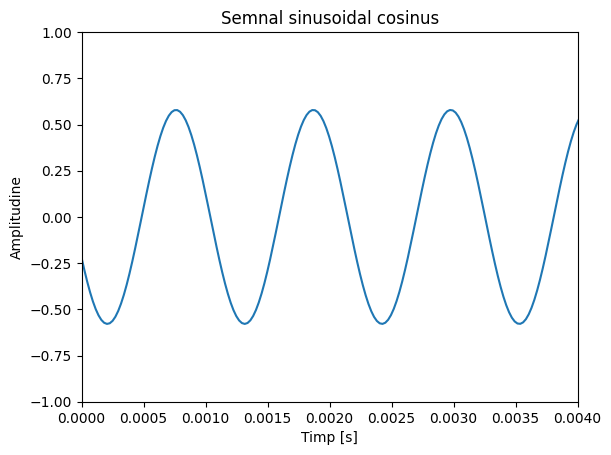

In [ ]:
# Semnal sinusoidal de tip sinus 
amplitudine = numpy.random.uniform(0.5, 0.9)
frecventa = numpy.random.uniform(500, 1000)
faza = numpy.random.uniform(0, 2 * numpy.pi)
frecventa_de_esantionare = 44100
timp = 5
t = numpy.linspace(0,timp, int(timp * frecventa_de_esantionare))
semnal_sinus = amplitudine * numpy.sin(2 * numpy.pi * frecventa * t + faza)
plt.plot(t, semnal_sinus)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal sinus')
plt.xlim(0, 0.004)
plt.ylim(-1, 1)
plt.savefig(fname = './semnal_sinusoidal_sinus.pdf', format = 'pdf')
plt.show()

sounddevice.play(semnal_sinus, frecventa_de_esantionare)
rate = int(10e5)
wavf.write("semnal_sinusoidal_sinus.wav", rate, semnal_sinus)
print("Finished first signal, waiting 2 seonds")
time.sleep(2)
semnal_cosinus = amplitudine * numpy.sin(2 * numpy.pi * frecventa * t + faza + numpy.pi / 2)
plt.plot(t, semnal_cosinus)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cosinus')
plt.xlim(0, 0.004)
plt.ylim(-1, 1)
plt.savefig(fname = './semnal_sinusoidal_sinus.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_cosinus, frecventa_de_esantionare)
wavf.write("semnal_sinusoidal_cosinus.wav", rate, semnal_cosinus)

Exercitiul 2

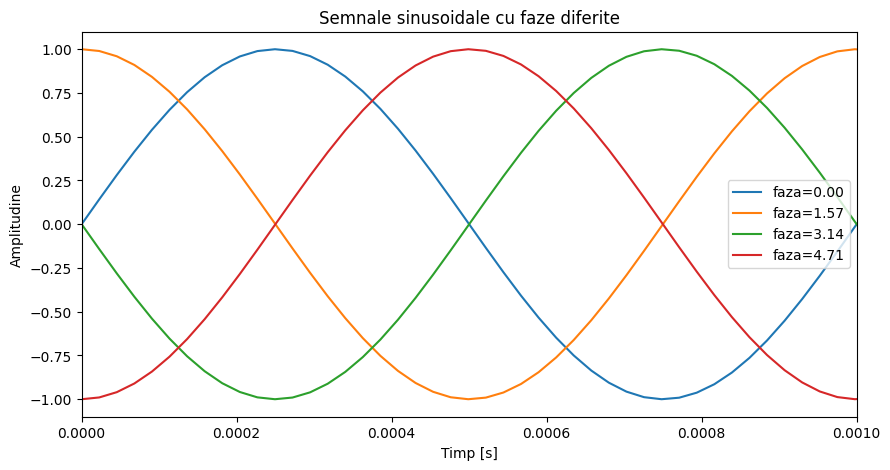

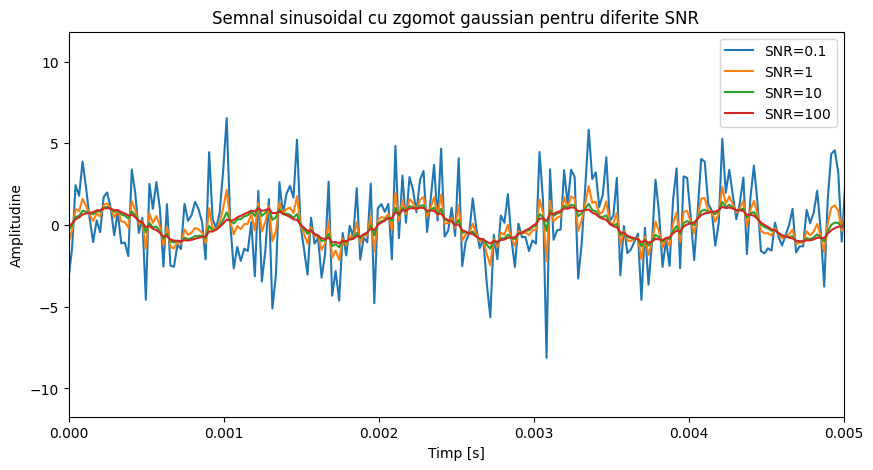

In [127]:
frec = 1000
amplitudine_unitara = 1
timp = 1
frecventa_de_esantionare = 44100
t = numpy.linspace(0, timp, int(timp * frecventa_de_esantionare))
faze = [0, numpy.pi/2, numpy.pi, 3*numpy.pi/2]
semnale = [amplitudine_unitara * numpy.sin(2 * numpy.pi * frec * t + faza) for faza in faze]

plt.figure(figsize=(10,5))
for idx, semnal in enumerate(semnale):
    plt.plot(t, semnal, label=f'faza={faze[idx]:.2f}')
plt.xlim(0, 0.001)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnale sinusoidale cu faze diferite')
plt.legend()
plt.show()

z = numpy.random.normal(0, 1, t.shape)
x = semnale[0]
snr_values = [0.1, 1, 10, 100]
noisy_signals = []

for snr in snr_values:
    gamma = numpy.linalg.norm(x) / (numpy.sqrt(snr) * numpy.linalg.norm(z))
    x_noisy = x + gamma * z
    noisy_signals.append(x_noisy)

plt.figure(figsize=(10,5))
for idx, x_noisy in enumerate(noisy_signals):
    plt.plot(t, x_noisy, label=f'SNR={snr_values[idx]}')
plt.xlim(0, 0.005)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cu zgomot gaussian pentru diferite SNR')
plt.legend()
plt.show()


Exercitiul 3